<a href="https://colab.research.google.com/github/ayushs0911/Projects/blob/main/Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem: Lead Scoring Model

Selling something is not an easy task. A business might have many potential customers, commonly referred as leads, but not enough resources to cater them all. Even most of the leads won’t turn into actual bookings. So there is a need for a system that prioritises the leads, and sorts them on the basis of a score, referred to here as lead score. So whenever a new lead is generated, this system analyses the features of the lead and gives it a score that correlates with chances of it being converted into booking. Such ranking of potential customers not only helps in saving time but also helps in increasing the conversion rate by letting the sales team figure out what leads to spend time on.


Here you have a dataset of leads with their set of features and their status. You have to build a ML model that predicts the lead score as an OUTPUT on the basis of the INPUT set of features. This lead score will range from 0-100, so more the lead score means more chances of conversion of lead to WON.


- NOTE: The leads with STATUS other than ‘WON’ or ‘LOST’ can be dropped during training.
- NOTE: Treat all columns as CATEGORICAL columns
NOTE: 
This '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN and could be present in more than one column.


Steps should be:
- Data Cleaning ( including Feature Selection)
- Training ( on Y percent of data)
- Testing ( on (100-Y) percent of data)
- Evaluate the performance using metrics such as accuracy, precision, recall and F1-score.


In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [141]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
#importing dataset from google drive
from google.colab import drive
drive.mount('/content/drive')
     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Data_Science_Internship - Dump.csv')


### Taking a Quick look at data structure 

In [6]:
df.replace(
    to_replace=['9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0'],
    value='NaN',
    inplace=True
)

In [7]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


##Data Cleaning 

<Axes: >

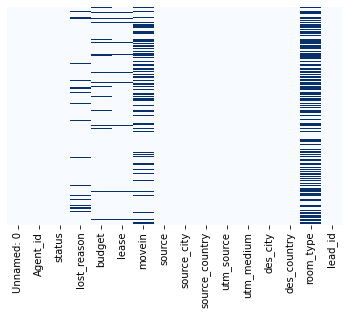

In [9]:
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap = 'Blues')


Plenty of missing values, Let's analyse them. 

In [10]:
df.isnull().sum()

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

In [11]:
df[df['lost_reason'].isnull()]

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
98,98,c077ad291c7b691b8defba867c1b937f16e878c1f3bdd5...,WON,NaN,109,51,NaN,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,acb208d3ac02ab6d5a45120b4187f12bc41a132011fe1c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b66690fb86da687dda8d0e4be51958aab94e4b595272d7...
111,111,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,WON,NaN,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,09/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ef6d625bd287131ad98e4ed57295037bb46e4864f9d6ef...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,71b89d8b802ddcc0120ec5352d9c0fe5bde35a3aff101b...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,eab489be32de234eb13f3ef643755451a2c2d876dadae9...
139,139,59e1dc79a681665177701a504d7d704e1b6e36a4e191f4...,WON,NaN,£181 - £240 Per Week,Full Year Course Stay 40 - 44 weeks,29/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,acb208d3ac02ab6d5a45120b4187f12bc41a132011fe1c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,adbc799bdd9422ca4083ef3d83389853f1d72280efe25f...
141,141,96ab6152cb421b4d4012a4903c19004608a342a5f7c667...,WON,NaN,> 300£ Per Week,Complete Education Year Stay 50 - 52 weeks,07/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,aff03877c7a6e8799057e5ad4b82de902487b7c7f30dbf...
152,152,53eb7f9dcaa22b09db85547fa158a6893089db596bfdcc...,WON,NaN,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,69f0114003f8a8ec5f99506325f8ca6a5ca237c9fe91ba...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,1c4cb4a47a62cce90db6619f8ddeed9eb2c0a598a6d0ed...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46559,46559,4ab75b931e46eda84e381be209b305d1ad8833f230eb24...,WON,NaN,139,42,01/10/22,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,f618d9049cbfb9410ad8d47541218cc7a2a9e930750f59...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,69f81619d0ef92cbb165a44e76f4f0c284d2aa83c318fa...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,c4f2571fb68158cf43193eaaae6241d94652abae4ff953...
46566,46566,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,WON,NaN,179,51,10/09/22,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,ac15eb6ea0471bd80c833fa9d4ff9799de32a00b4681b0...,735b17b54154132f4d5c48eebcabe058b0e5a2953932ad...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,69f81619d0ef92cbb165a44e76f4f0c284d2aa83c318fa...,c384826dfbfce62c3fd99a46984a56fe71546a85c2cb6c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,f2a5171da297accb58cb0d1ad4480127032153e3437164...
46570,46570,96ab6152cb421b4d4012a4903c19004608a342a5f7c667...,WON,NaN,180,44,16/09/22,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,ecc0e7dc084

It seems like lost reason is 'NaN', where status is won. 

In [12]:
df['lost_reason'].fillna('Not appicable, Booking Accepted', inplace = True)

Too many values are missing in movein and roomtype. Dropping both the columns. 

In [13]:
df.drop(['movein', 'room_type'], axis =1, inplace = True)

In [14]:
df[df['budget'].isnull()]

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
25,25,6b61e611d25ec81e83491a7e289ed7483d067c4c9bb50e...,LOST,Not responding,NaN,0,NaN,NaN,abd149214539d9f222d25de6358735b9fa0efd3956f661...,ec8202b6f9fb16f9e26b66367afa4e037752f3c09a18ce...,4ed379d418bb86290a01117e9ceb0debffc4d1b7087db6...,6a5ed83658ef85afc77709cc16ede854ad98e3c2ad8b07...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,11912c46b1c88029c447f4bbd61669680bf114881f4a1a...
27,27,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,NaN,0,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,4ed379d418bb86290a01117e9ceb0debffc4d1b7087db6...,0a8ad51fea30c29587f61bd8420a49602aa78304833627...,02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e927379...,27ecd20aff6354468464e8f69eb31bf64232a5d93b27a2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46505,46505,53eb7f9dcaa22b09db85547fa158a6893089db596bfdcc...,LOST,Not a student,NaN,NaN,b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb4...,NaN,NaN,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,4f86ca37dd9e4b9b0c94b2fc9dc36771317ce4593f93f9...,NaN,NaN,3451f0dc40f9e1e4f8a86d837716fdeb4c3674566d723c...
46509,46509,64ce47d15992e40da1dd9e37330f1aa90bf11b5878258a...,LOST,No supply,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,086eec074ad18d1159de3c076d7f7d8a55f5bc8d134f6f...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,9c2eeb40e195e586e6eab1335d3644b178e9002de061c1...
46572,46572,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Not interested,NaN,0,9c225a25baf2847828f299f46f22428571a4b305ad465e...,NaN,NaN,44574c4ba2ea74ad4bf1e184133cdbf4e7390a3690beff...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,c384826dfbfce62c3fd99a46984a56fe71546a85c2cb6c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,f88dc31ca77b5271e7df490af95e0cab85a3d859b0edc2...
46581,46581,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,8eb1790c9a94820022b72682ba955490697174ddc61293...


In [15]:
df.isnull().sum()

Unnamed: 0           0
Agent_id             0
status               0
lost_reason          0
budget            3700
lease             2341
source               0
source_city          0
source_country       0
utm_source           0
utm_medium           0
des_city             0
des_country          0
lead_id              0
dtype: int64

Budget and Lease can be the most important features of our machine learning modelling. Taking any assumption of their values can create bias in our modelling. <br>
Dropping the rows, where budget and lease are Null. 

In [16]:
df[df['budget'].isnull()].lease

0        NaN
1        NaN
4        NaN
25         0
27         0
        ... 
46505    NaN
46509    NaN
46572      0
46581    NaN
46582    NaN
Name: lease, Length: 3700, dtype: object

In [17]:
df.dropna(inplace = True)

In [18]:
df.isnull().sum()

Unnamed: 0        0
Agent_id          0
status            0
lost_reason       0
budget            0
lease             0
source            0
source_city       0
source_country    0
utm_source        0
utm_medium        0
des_city          0
des_country       0
lead_id           0
dtype: int64

No missing values, now we can start our analysis. 

**Dropping status other than Won and Lost**

In [19]:
df['status'].value_counts()

LOST           39561
WON             2991
OPPORTUNITY      248
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

In [20]:
df = df.loc[df['status'].isin(['WON', 'LOST'])]


In [21]:
df['status'].value_counts()

LOST    39561
WON      2991
Name: status, dtype: int64

## Data Exploration 

In [22]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
5,5,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Wants private accommodation,120,semester-stay,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b26f82b657d94e19ef8382877006c3e9425d7e4ab836f9...
6,6,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Short stay,0-0,0,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,7ea9868bb6b4ebe610b0e509950b10322bcb7241d4a101...
7,7,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£181 - £240 Per Week,51,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...


In [23]:
df.nunique()

Unnamed: 0        42552
Agent_id            120
status                2
lost_reason          31
budget             1843
lease               304
source              451
source_city        4316
source_country      183
utm_source           32
utm_medium           58
des_city            216
des_country          15
lead_id           29106
dtype: int64

Drooping `Unnamed: 0`, `lead_id`, as it is unique to every booking. 

In [24]:
df.drop(['Unnamed: 0', 'lead_id'], axis =1, inplace = True)

##Performing Chisquare test
ChiSquare test is performed for checking dependency between categorical to categorical variables.

P-value is calculated for each categorical variable with respect to Status
Variables 
- P-values less than 0.05 are selected

In [25]:
def chisquare(df, cat1, cat2):
  import pandas as pd
  from scipy.stats import chi2_contingency  
  a,b,c,d = chi2_contingency(pd.crosstab(df[cat1], df[cat2]))
  return b 

In [26]:
Q = []
for i in df.columns:
  Q.append(chisquare(df, 'status',i))

In [27]:
Q = pd.Series(Q)
Q.index = df.columns
Q = Q.sort_values()
Q

status             0.000000e+00
lost_reason        0.000000e+00
source             0.000000e+00
utm_source         0.000000e+00
lease             2.183785e-252
des_city          9.388011e-247
budget            1.944715e-209
Agent_id          2.600247e-171
utm_medium        1.079325e-125
des_country        1.777175e-24
source_country     3.427325e-18
source_city        9.999956e-01
dtype: float64

In [28]:
important_columns = list(Q[Q<=0.5].index)

In [29]:
data = pd.get_dummies(df[important_columns])

In [30]:
data.head()

,status_LOST,status_WON,lost_reason_Booked on campus accommodation,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,...,source_country_e510850db99d8648b1f61ace98d3fd67ab63a7ed689e22eba1472009620c029b,source_country_e6ca7ff449664bd6e363db8cc72dc603b88326d1521b87ab82d4dd4bb392b73b,source_country_e891c4c31acbff0a99f3fbdca99e0d50a90f11083b04dcc7d8fa6089e5d02385,source_country_eca8280683eb029192b1f2a88d89846ce3835bc828bf62685c6f0c350418a084,source_country_ef38c2f2eeb87e2cbba80fa7f55f8c08fc75f944cd65f6b7f7b7c3379e6ecaaa,source_country_f1987974a901281b7c3ed121be5f00af0521f0873bd422f029ee3144fd4099d7,source_country_f24b3e6d69d95512e334bc1cd7d3a80dcd8ffd151c14e97aa06ef132df9e743e,source_country_f59c8750c15e65b667543a7a6b6a8e37561a9d9d18919e0b13c6c6628085ec12,source_country_f782d1dbfba17a52a417972d81ef55a8bc60090f4bfbcc4c5f4c8be11bf7015b,source_country_fde332912b5855a3ba1c42cbc50c29922e91f4f17bcaf82dc1b2c23e2747bd31
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X = data.drop(['status_LOST', 'status_WON'], axis =1)
X.head()

,lost_reason_Booked on campus accommodation,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,...,source_country_e510850db99d8648b1f61ace98d3fd67ab63a7ed689e22eba1472009620c029b,source_country_e6ca7ff449664bd6e363db8cc72dc603b88326d1521b87ab82d4dd4bb392b73b,source_country_e891c4c31acbff0a99f3fbdca99e0d50a90f11083b04dcc7d8fa6089e5d02385,source_country_eca8280683eb029192b1f2a88d89846ce3835bc828bf62685c6f0c350418a084,source_country_ef38c2f2eeb87e2cbba80fa7f55f8c08fc75f944cd65f6b7f7b7c3379e6ecaaa,source_country_f1987974a901281b7c3ed121be5f00af0521f0873bd422f029ee3144fd4099d7,source_country_f24b3e6d69d95512e334bc1cd7d3a80dcd8ffd151c14e97aa06ef132df9e743e,source_country_f59c8750c15e65b667543a7a6b6a8e37561a9d9d18919e0b13c6c6628085ec12,source_country_f782d1dbfba17a52a417972d81ef55a8bc60090f4bfbcc4c5f4c8be11bf7015b,source_country_fde332912b5855a3ba1c42cbc50c29922e91f4f17bcaf82dc1b2c23e2747bd31
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y = data['status_WON']

In [33]:
X.shape, y.shape

((42552, 3253), (42552,))

### Splitting Data in training and test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [36]:
len(X_train), len(X_test), len(y_train), len(y_test)

(34041, 8511, 34041, 8511)

## Modelling Experiments 

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [39]:
def plot_confusion_matrix(y, y_predict):
  from sklearn.metrics import confusion_matrix 

  cm = confusion_matrix(y, y_predict)
  ax = plt.subplot()
  sns.heatmap(cm, annot = True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True Labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(['Lost', 'Won'])
  ax.yaxis.set_ticklabels(['Lost', 'Won'])
  plt.show()

In [40]:
def calculate_results(y_true, y_pred):
  from sklearn.metrics import accuracy_score, precision_recall_fscore_support

  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array
  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

##Model 1 : Logistic Regression 
Creating a logistic regression object then create a GridSearchCV object `logreg_cv` with cv = 10. Fitting the object to find the best parameters from dictionary. 

In [79]:
parameters = {"C" : [0.01,0.1,1],
              'penalty' : ['l2'], #l1 lasso l2 ridge 
              'solver' : ['lbfgs']}
lr = LogisticRegression()
gs_cv = GridSearchCV(lr, parameters, scoring = 'accuracy', cv = 10)
logreg_cv = gs_cv.fit(X_train, y_train)

`GridSearchCV` object for logistic regression. 
- we can display the best parameters using the data attribute `best_params_` and the accuracy on validation data using the data attribute `best_score_`


In [80]:
print("tuned hyperparameters (best_parameters):", logreg_cv.best_params_)
print("accuracy: ", logreg_cv.best_score_)

tuned hyperparameters (best_parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy:  1.0


Let's look at the confusion matrix 

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix (y_true = y_test,
                        y_pred = logreg_cv.predict(X_test) ))
print(classification_report(y_true = y_test,
                        y_pred = logreg_cv.predict(X_test) ))

[[7902    0]
 [   0  609]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7902
           1       1.00      1.00      1.00       609

    accuracy                           1.00      8511
   macro avg       1.00      1.00      1.00      8511
weighted avg       1.00      1.00      1.00      8511



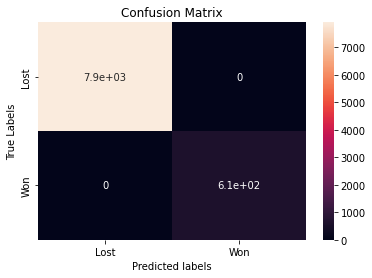

In [82]:
y_hat = logreg_cv.predict(X_test)
plot_confusion_matrix(y_test, y_hat)

In [83]:
y_hat[:100]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [46]:
logistic_regression_model_result = calculate_results(y_true = y_test,
                                                     y_pred = y_hat)
logistic_regression_model_result

{'accuracy': 100.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

## Model 2 : DecisionTreeClassifier

In [50]:
tree = DecisionTreeClassifier()
tree_cv = tree.fit(X_train, y_train)

In [47]:
tree_cv.score(X_test, y_test)

1.0

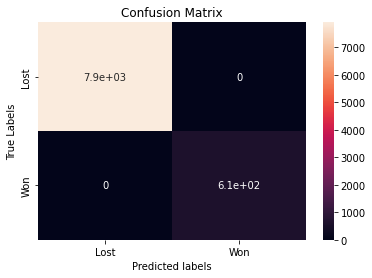

In [54]:
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(y_test, yhat_tree)

In [60]:
yhat_tree[:100]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [71]:
decision_tree_model_result = calculate_results(y_true = y_test,
                                                     y_pred = yhat_tree)
decision_tree_model_result

{'accuracy': 100.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

##Model 3: Support Vector Machine 

In [72]:
svm = SVC()
svm_cv = svm.fit(X_train, y_train)

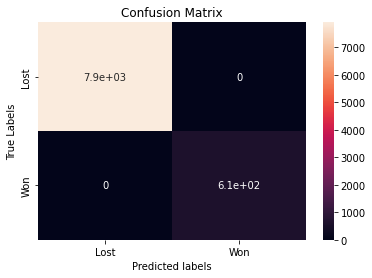

In [73]:
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(y_test, yhat_svm)

In [74]:
svm_model_result = calculate_results(y_true = y_test,
                                     y_pred = yhat_svm)
svm_model_result

{'accuracy': 100.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

###All the 3 model results giving the perfect score. 

Now calculating the lead score as an output of input features. 

In [84]:
probability = logreg_cv.predict_proba(X_test)

In [86]:
probability.shape

(8511, 2)

In [123]:
chance = np.round_(probability[:,1]*100, decimals = 2)
chance

array([2.9 , 0.85, 2.02, ..., 1.72, 1.16, 0.94])

Sorting the top 20 lead score. 

In [132]:
pd.DataFrame(chance).sort_values(by=0, ascending=False)[:20]

,0
8117,90.25
4942,89.95
6455,89.76
7818,89.76
4852,89.74
875,89.30
5072,89.29
5335,89.22
85,89.04
983,89.04


Defining a function to take on random sample and calcualte its **lead score.**

In [97]:
import random

In [120]:
def lead_score_of_random_feature(model, data):
  probability = model.predict_proba(random.sample(data.values.tolist(), 1))
  chance = np.round_(probability[:,1]*100, decimals = 2)
  return print(f"Lead score of this sample is {chance.item()}")

In [137]:
lead_score_of_random_feature(model = logreg_cv, data = X_test)

Lead score of this sample is 1.37


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [145]:
def lead_score_of_10_random_feature(model, data):
  lead_score = []
  for i in range(10):
    probability = model.predict_proba(random.sample(data.values.tolist(), 1))
    chance = np.round_(probability[:,1]*100, decimals = 2)
    lead_score.append(chance.item())


  return print(f"Lead score of 10 random samples is {lead_score}")

In [146]:
lead_score_of_10_random_feature(model = logreg_cv, data = X_test)

Lead score of 10 random samples is [79.24, 1.35, 1.51, 0.75, 1.02, 2.22, 1.42, 0.95, 1.41, 1.33]
